In [114]:
%load_ext autoreload
%autoreload 2

# import sys
# sys.path.append('..')
%cd '/Users/kera/Dropbox/RESEARCH/Experiments/javi/mavi/'

import torch
import numpy as np
import matplotlib.pyplot as plt

from mavi.vanishing_ideal import VanishingIdeal
from mavi.util.preprocessing import Preprocessor
from sympy.abc import x, y

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/kera/Dropbox/RESEARCH/Experiments/javi/mavi


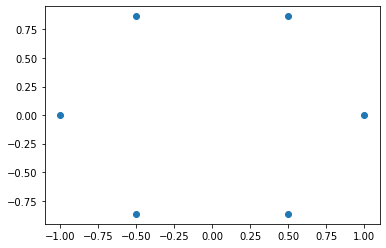

In [61]:
theta = [np.pi*i/3 for i in range(6)]
X = np.vstack((np.cos(theta), np.sin(theta))).T

plt.plot(X[:,0], X[:,1], "o")

In [62]:
X = np.repeat(X, 1000, axis=0)

In [21]:
vi = VanishingIdeal()
vi.fit(X, 0.01, method="vca", backend='numpy', gamma=1e-6)  # grad normalization

In [81]:
Z = np.repeat(X, 20, axis=1)

In [64]:
%%time
vi = VanishingIdeal()
vi.fit(X, 0.01, method="vca", backend='numpy', with_preprocessing=False)  

CPU times: user 7.23 s, sys: 977 ms, total: 8.2 s
Wall time: 1.77 s


In [66]:
%%time
vi = VanishingIdeal()
vi.fit(Z, 0.01, method="vca", backend='numpy', with_preprocessing=False)  

CPU times: user 7.27 s, sys: 929 ms, total: 8.2 s
Wall time: 1.66 s


In [67]:
%%time
vi = VanishingIdeal()
vi.fit(Z, 0.01, method="vca", backend='numpy', with_preprocessing=True)  

CPU times: user 9.19 s, sys: 1.12 s, total: 10.3 s
Wall time: 2.12 s


In [50]:
Z.shape

(6000, 4)

In [30]:
vi.preprocessor.V

array([[-1.],
       [-0.]])

In [70]:
pre.fit_transform(Z)

array([[-4.95498963e-17, -1.41421356e+00],
       [-4.95498963e-17, -1.41421356e+00],
       [-4.95498963e-17, -1.41421356e+00],
       ...,
       [-1.22474487e+00, -7.07106781e-01],
       [-1.22474487e+00, -7.07106781e-01],
       [-1.22474487e+00, -7.07106781e-01]])

In [69]:
pre.fit_transform(Z).shape

(6000, 2)

In [115]:
%%time
pre = Preprocessor()
Z_ = pre.fit_transform(Z)

CPU times: user 6.79 s, sys: 367 ms, total: 7.15 s
Wall time: 1.33 s


In [116]:
%%time
vi = VanishingIdeal()
vi.fit(Z, 0.01, method="grad", backend='numpy')  

CPU times: user 1.86 s, sys: 749 ms, total: 2.6 s
Wall time: 447 ms


In [122]:
%%time
vi = VanishingIdeal()
vi.fit(Z_, 0.01, method="grad", backend='numpy')  

CPU times: user 60.2 ms, sys: 13.1 ms, total: 73.3 ms
Wall time: 112 ms


In [ ]:
vi.plot

In [121]:
%%time
vi = VanishingIdeal()
vi.fit(Z, 0.01, method="vca", backend='numpy', with_preprocessing=False)  

CPU times: user 13 s, sys: 1.35 s, total: 14.4 s
Wall time: 2.66 s


In [120]:
%%time
vi = VanishingIdeal()
vi.fit(Z_, 0.01, method="vca", backend='numpy', with_preprocessing=False)  

CPU times: user 6.31 s, sys: 1.7 s, total: 8.01 s
Wall time: 1.59 s


In [95]:
type(X)

numpy.ndarray

In [97]:
import jax.numpy as jnp

/Users/kera/miniforge3/lib/python3.9/site-packages/jax/lib/__init__.py:31: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


ModuleNotFoundError: jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.

In [98]:
import torch

In [99]:
torch.where

<function _VariableFunctionsClass.where>

In [100]:
A = torch.tensor(np.random.randn(2,3))

In [101]:
torch.mean(A, 0)

tensor([ 1.0573,  0.4599, -0.1525], dtype=torch.float64)

In [104]:
torch.cumsum(A)

TypeError: cumsum() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (Tensor input, int dim, *, torch.dtype dtype, Tensor out)
 * (Tensor input, name dim, *, torch.dtype dtype, Tensor out)


In [107]:
torch.cumsum(torch.randn(10))

TypeError: cumsum() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (Tensor input, int dim, *, torch.dtype dtype, Tensor out)
 * (Tensor input, name dim, *, torch.dtype dtype, Tensor out)


In [110]:
a = torch.randn(10)
torch.cumsum(a, dim=0)

tensor([-0.3996, -2.4881, -2.4673, -1.4861, -1.3389, -1.6291, -0.1022, -0.8936,
        -0.1880,  0.1650])